In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp,LSODA
from tqdm import tqdm

figpath = r"H:\PERSONAL\PROJECTS\Programming\ACADEMICS\Int_lab2\NL_circuits\figures"

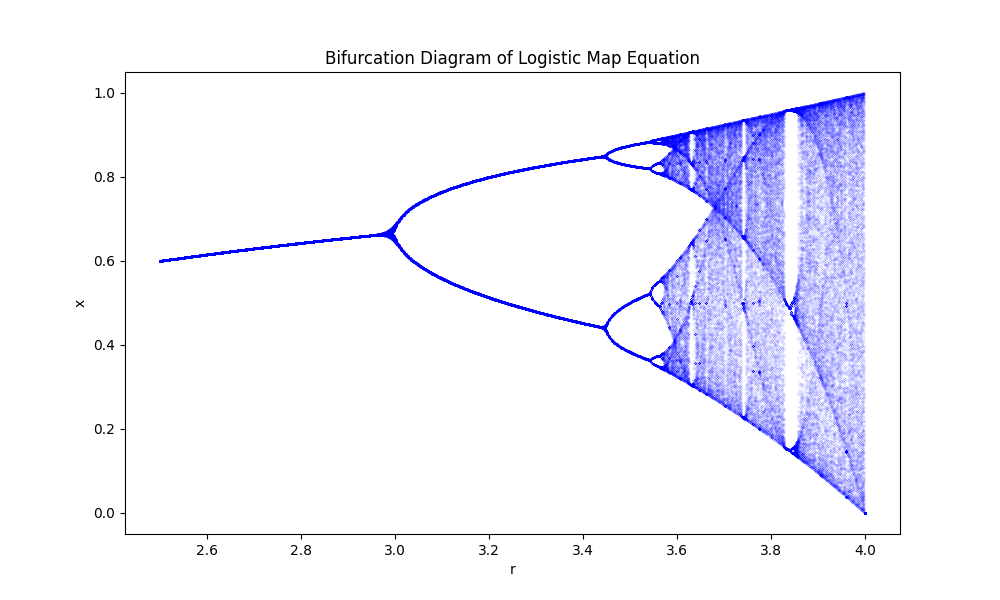

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Logistic map function
def logistic_map(r, x):
    return r * x * (1 - x)

# Function to generate bifurcation diagram
def bifurcation_diagram(r_values, x0=0.5, num_iterations=1000, num_transient=100):
    bifurcation_x = []
    bifurcation_r = []

    for r in r_values:
        x = x0
        for _ in range(num_transient):
            x = logistic_map(r, x)
        
        for _ in range(num_iterations):
            x = logistic_map(r, x)
            bifurcation_r.append(r)
            bifurcation_x.append(x)
    
    return bifurcation_r, bifurcation_x

# Parameters
r_values = np.linspace(2.5, 4.0, 1000)
num_iterations = 300
num_transient = 100

# Generate bifurcation diagram
bifurcation_r, bifurcation_x = bifurcation_diagram(r_values, num_iterations=num_iterations, num_transient=num_transient)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(bifurcation_r, bifurcation_x, s=0.01, c='blue', marker='.')
plt.title('Bifurcation Diagram of Logistic Map Equation')
plt.xlabel('r')
plt.ylabel('x')
plt.show()


### Lorentz Circuit Simulator constants


In [11]:
# Lorenz Attractor


# Circuit parameters (resistances in Ohms, capacitances in Farads, voltages in Volts)
# FROM Msc thesis

R1 = 10e3
R2 = 100e3
R3 = 10e3
R4 = 100e3

R5 = 0.9765e3 #variable (potentiometer)
# R5 = 1e3

R6 = 5.6e3
R7 = 3.3e3
R8 = 3.6e3
R9 = 3.19e3
R10 = 100e3
R11 = 1e3
R12 = 3.3e3
R13 = 37.5e3
R14 = 3.3e3
R15 = 3.74e3
R16 = 100e3
R17 = 1e3
R18 = 1e3
R19 = 9e3

C1 = 200e-9
C2 = 200e-9
C3 = 200e-9

# Initial conditions
state_0 = [0.1, 0.1, 0.9]
t_0 = 0.0
t_f = 0.04
max_step = 0.005

def equations(t, state):
    X, Y, Z = state
    
    # Non-linear circuit equations
    dxdt = (- X - ((R4/R1) * X) + ((R4/R2) * X) + (R4/R3) * Y) / (C1 * R5)
    dydt = (- Y - ((R10/R7) *X * Z) + ((R10/R8) * X)) / (C2 * R11)
    dzdt = (- Z - ((R16/R13) * Z) + ((R16/R14) * X * Y)) / (C3 * R17)
    
    return [dxdt, dydt, dzdt]

In [12]:
alpha_val_X = (-1 - (R4/R1) + (R4/R2)) / (C1 * R5)
alpha_val_Y = (R4/R3) / (C1 * R5)
rho_val = (R10 / R8) / (C2 * R11)
beta_val = (1 + (R16 / R13)) / (C2 * R11)
val100_30 = (R16 / R14) / (C3 * R17)
val_30 = (R10 / R7) / (C2 * R11)
val_1 = 1 / (C2 * R11)

# print(f"alpha_X = {alpha_val_X}")
# print(f"alpha_Y = {alpha_val_Y}")
# print(f"rho = {rho_val}")
# print(f"beta = {beta_val}")
# print(f"100_30 = {val100_30}")
# print(f"30 = {val_30}")
# print(f"1 = {val_1}")

alpha_val_X = -(-1 - (R4/R1) + (R4/R2))
alpha_val_Y = (R4/R3)
rho_val = (R10 / R8)
beta_val = (1 + (R16 / R13)) 
val100_30 = (R16 / R14) 
val_30 = (R10 / R7) 
val_1 = 1 

print(f"alpha_X = {alpha_val_X}")
print(f"alpha_Y = {alpha_val_Y}")
print(f"rho = {rho_val}")
print(f"beta = {beta_val}")
print(f"100_30 = {val100_30}")
print(f"30 = {val_30}")
print(f"1 = {val_1}")



alpha_X = 10.0
alpha_Y = 10.0
rho = 27.77777777777778
beta = 3.6666666666666665
100_30 = 30.303030303030305
30 = 30.303030303030305
1 = 1


In [13]:
print(8/3)

2.6666666666666665


In [14]:
# # Circuit parameters (resistances in Ohms, capacitances in Farads, voltages in Volts)
# # FROM Sumegha

# R1 = 9.78e3
# R2 = 99e3
# R3 = 9.84e3
# R4 = 97.9e3
# R5 = 1e3 #variable (potentiometer)
# R6 = 5.6e3
# R7 = 3.265e3
# R8 = 3.6e3
# R9 = 3.191e3
# R10 = 100.1e3
# R11 = 0.995e3
# R12 = 3.278e3
# R13 = 36.49e3
# R14 = 3.234e3
# R15 = 3.74e3
# R16 = 99.51e3
# R17 = 0.997e3
# R18 = 1.004e3
# R19 = 9.01e3

# C1 = 200e-9
# C2 = 200e-9
# C3 = 200e-9

### Solving single instance

In [15]:
# Solve the ODE system using LSODA method
sol = LSODA(equations,  t_0, state_0, t_f, vectorized=True)

# initialize the solution array
X = [sol.y[0]]
Y = [sol.y[1]]
Z = [sol.y[2]]
t = [sol.t]

print(sol.status)

while sol.status != 'finished':
    sol.step()
    t.append(sol.t)
    X.append(sol.y[0])
    Y.append(sol.y[1])
    Z.append(sol.y[2])
    

print(sol.status)

print(t[0], X[0], Y[0], Z[0])
print(t[-1], X[-1], Y[-1], Z[-1])
print(f"{len(t)} steps completed")


running
finished
0.0 0.1 0.1 0.9
0.04 0.5345788001260321 0.5301084607678256 1.191103659571193
12123 steps completed


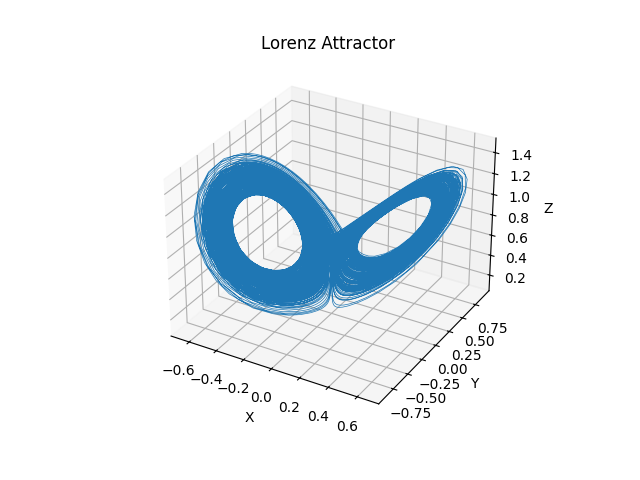

In [16]:
# for creating a responsive plot
%matplotlib widget
 
# creating figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(X, Y, Z, lw=0.5,alpha=1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Lorenz Attractor')
plt.show()

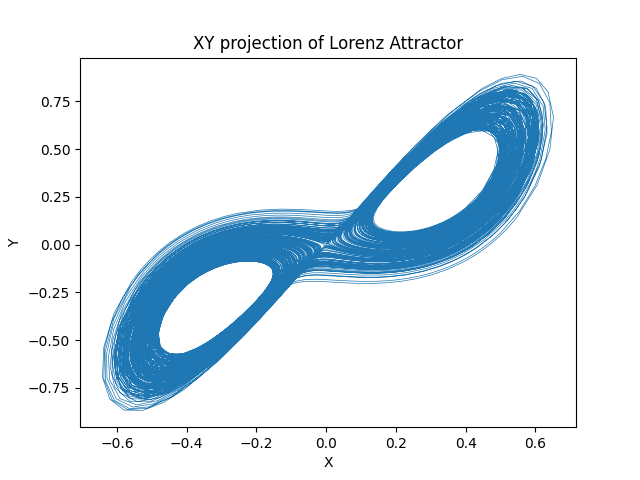

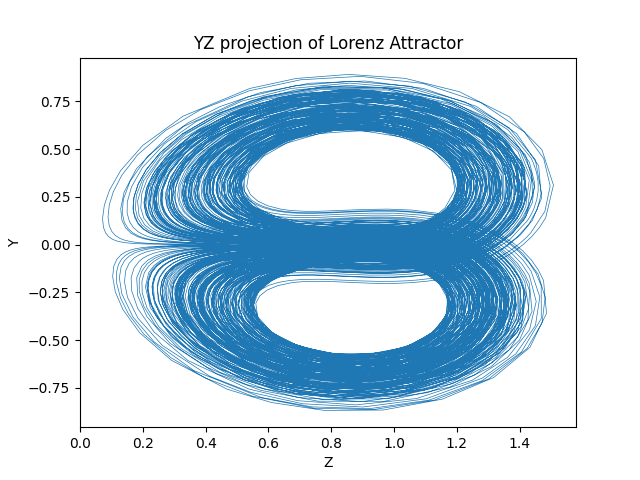

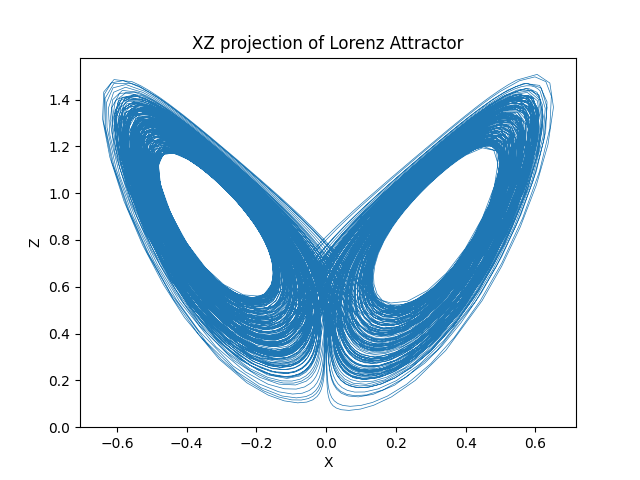

In [17]:
# Plot XY, YZ, XZ projections of the attractor as 3 different plots and save them 

save = True

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(X, Y, lw=0.5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('XY projection of Lorenz Attractor')
if save:plt.savefig(figpath+'\Lor_sim_XY.png')
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(Z, Y, lw=0.5)
ax.set_xlabel('Z')
ax.set_ylabel('Y')
ax.set_title('YZ projection of Lorenz Attractor')
if save: plt.savefig(figpath+'\Lor_sim_YZ.png')
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(X, Z, lw=0.5)
ax.set_xlabel('X')
ax.set_ylabel('Z')
ax.set_title('XZ projection of Lorenz Attractor')
if save: plt.savefig(figpath+'\Lor_sim_XZ.png')
plt.show()


### Bifurcation Diagram

In [18]:
def solve_for_R(R):
    R6 = R
    sol = LSODA(equations,  t_0, state_0, t_f, vectorized=True)
    X = [sol.y[0]]
    Y = [sol.y[1]]
    Z = [sol.y[2]]
    t = [sol.t]
    while sol.status != 'finished':
        sol.step()
        t.append(sol.t)
        X.append(sol.y[0])
        Y.append(sol.y[1])
        Z.append(sol.y[2])
    return t, X, Y, Z

In [19]:
# defint the range of changing R
R_range = np.linspace(0.1e3, 8e3, 500)

# initialize the bifurcation array
X2_max = []
Y2_max = []
Z2_max = []
R5_X2_max = []
R5_Y2_max = []
R5_Z2_max = []

X2_min = []
Y2_min = []
Z2_min = []
R5_X2_min = []
R5_Y2_min = []
R5_Z2_min = []

for R in tqdm(R_range):
    t_, X_, Y_, Z_ = solve_for_R(R)

    for i in range(1,len(t_)-1):

        if ((X_[i] >= X_[i-1]) and (X_[i] >= X_[i+1])) and not ((X_[i] == X_[i-1]) and (X_[i] == X_[i+1])):
            X2_max.append(X_[i])
            R5_X2_max.append(R)
        if ((X_[i] <= X_[i-1]) and (X_[i] <= X_[i+1])) and not ((X_[i] == X_[i-1]) and (X_[i] == X_[i+1])):
            X2_min.append(X_[i])
            R5_X2_min.append(R)
            
        if ((Y_[i] >= Y_[i-1]) and (Y_[i] >= Y_[i+1])) and not ((Y_[i] == Y_[i-1]) and (Y_[i] == Y_[i+1])):
            Y2_max.append(Y_[i])
            R5_Y2_max.append(R)
        if ((Y_[i] <= Y_[i-1]) and (Y_[i] <= Y_[i+1])) and not ((Y_[i] == Y_[i-1]) and (Y_[i] == Y_[i+1])):
            Y2_min.append(Y_[i])
            R5_Y2_min.append(R)
            
        if ((Z_[i] >= Z_[i-1]) and (Z_[i] >= Z_[i+1])) and not ((Z_[i] == Z_[i-1]) and (Z_[i] == Z_[i+1])):
            Z2_max.append(Z_[i])
            R5_Z2_max.append(R)
        if ((Z_[i] <= Z_[i-1]) and (Z_[i] <= Z_[i+1])) and not ((Z_[i] == Z_[i-1]) and (Z_[i] == Z_[i+1])):
            Z2_min.append(Z_[i])
            R5_Z2_min.append(R)

  2%|▏         | 12/500 [00:09<06:26,  1.26it/s]


KeyboardInterrupt: 

C:\Users\adhil\AppData\Local\Temp\ipykernel_21296\184058668.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure()


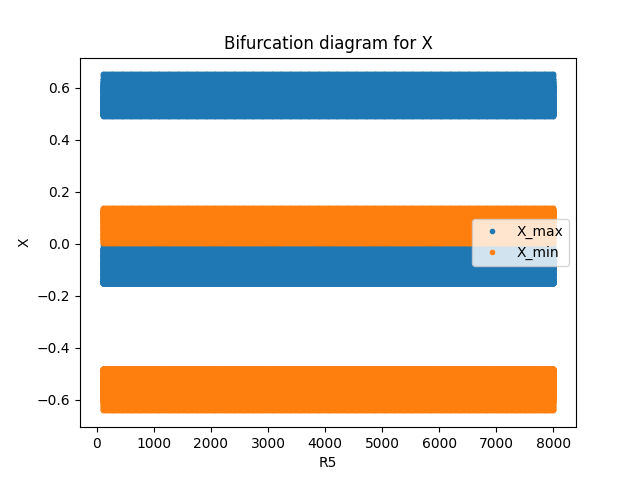

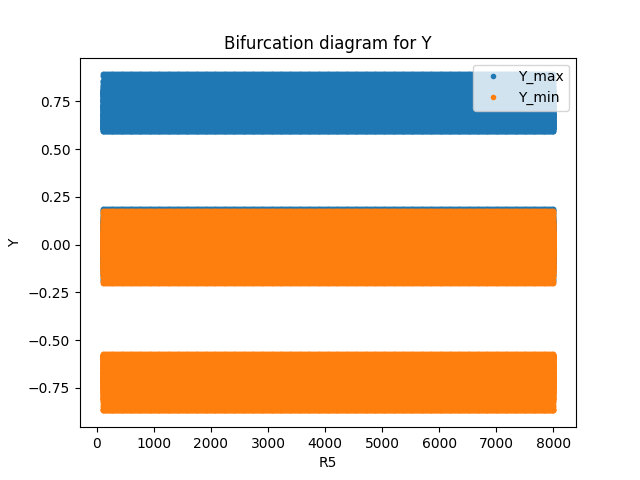

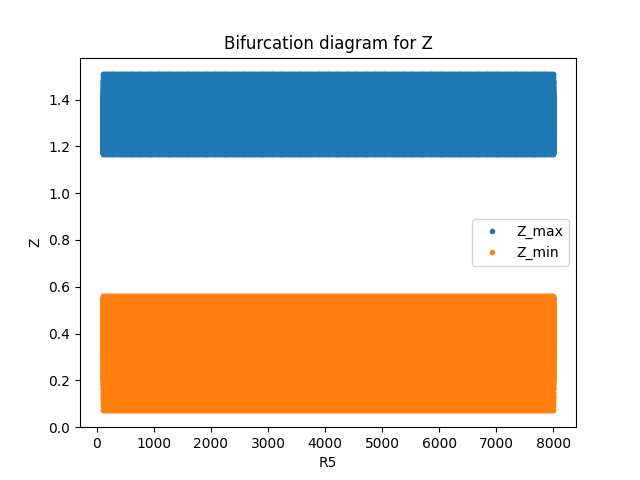

In [ ]:
# Plot the bifurcation diagram

save = False

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(R5_X2_max, X2_max, 'o', label='X_max', markersize = 3)
ax.plot(R5_X2_min, X2_min, 'o', label='X_min', markersize = 3)
plt.xlabel('R5')
plt.ylabel('X')
plt.title('Bifurcation diagram for X')
plt.legend()
if save: plt.savefig(figpath+'\Lor_sim_bifurcation_X.png')
else: plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(R5_Y2_max, Y2_max, 'o', label='Y_max', markersize = 3)
ax.plot(R5_Y2_min, Y2_min, 'o', label='Y_min', markersize = 3)
plt.xlabel('R5')
plt.ylabel('Y')
plt.title('Bifurcation diagram for Y')
plt.legend()
if save: plt.savefig(figpath+'\Lor_sim_bifurcation_Y.png')
else: plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(R5_Z2_max, Z2_max, 'o', label='Z_max', markersize = 3)
ax.plot(R5_Z2_min, Z2_min, 'o', label='Z_min', markersize = 3)
plt.xlabel('R5')
plt.ylabel('Z')
plt.title('Bifurcation diagram for Z')
plt.legend()
if save: plt.savefig(figpath+'\Lor_sim_bifurcation_Z.png')
else: plt.show()